In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib
matplotlib.use
import matplotlib.pyplot as plt
plt.style.use('seaborn-muted')


# load data
df = pd.read_csv('WindTurbineDesignHypervolumeMedianRun.csv')
dfmax = df.iloc[[-1]]
dfmaxt = dfmax.transpose()
dfmaxt.columns = ['median']
dfmaxt = dfmaxt.drop('FE', axis=0)

dfbest = pd.read_csv('WindTurbineDesignHypervolumeBestRun.csv')
dfmaxbest = dfbest.iloc[[-1]]
dfmaxbest = dfmaxbest.transpose()
dfmaxbest.columns = ['max']
dfmaxbest = dfmaxbest.drop('FE', axis=0)

labels={
    "NSGAIII": "NSGA-III",
    "SPEA2SDE": "SPEA2SDE",
    "SPEA2": "SPEA2",
    "CMOMBI2": "MOMBI2",
    "ThetaDEA": "ThetaDEA",
    "CMOEAD": "MOEA/D",
    "NSGAII": "NSGA-II",
    "HypE": "HypE",
    "CHHCO": "HHCO",
    "HHCORandom": "HHCO-rand"
}


def plot_hypervolume(algs, offsets):
    f = plt.figure(figsize=(8, 6))
    plt.subplots_adjust(right=0.85)
    ax = f.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)

    colors={
        "NSGAIII": "tab:blue",
        "SPEA2SDE": "tab:orange",
        "SPEA2": "tab:green",
        "CMOMBI2": "tab:red",
        "ThetaDEA": "tab:purple",
        "CMOEAD": "tab:brown",
        "NSGAII": "tab:pink",
        "HypE": "tab:grey",
        "CHHCO": "k",
    }

    styles={
        "NSGAIII": "-",
        "SPEA2SDE": "-",
        "SPEA2": "-",
        "CMOMBI2": "-",
        "ThetaDEA": "-",
        "CMOEAD": "-",
        "NSGAII": "-",
        "HypE": "-",
        "CHHCO": "--",
    }

    for alg in algs:
        df.plot(x="FE", y=alg, ax=f.gca(), legend=False, color=colors[alg], style=styles[alg])
        plt.text(9870, dfmax[alg]+offset[alg], labels[alg], color=colors[alg], fontsize=14) #, weight='bold')
    plt.xlabel("Fitness Evaluations", fontsize=14)
    plt.ylabel("Hypervolume", fontsize=14)
    ax.grid(True, ls='--')
    ax.tick_params(axis='both', which='both', labelsize=14,
               bottom=False, top=False, labelbottom=True,
               left=False, right=False, labelleft=True)
    ax.set_xlim(0, 9870)
    plt.show()
    return f


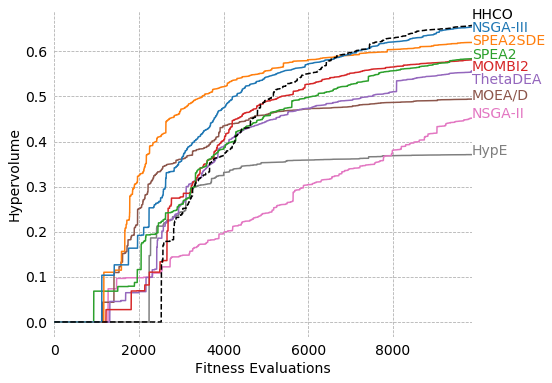

In [2]:
# all MOEAs and HHs

offset={
    "NSGAIII":  -0.010,
    "SPEA2SDE": -0.005,
    "SPEA2":     0.000,
    "CMOMBI2":  -0.025,
    "ThetaDEA": -0.030,
    "CMOEAD":    0.00,
    "NSGAII":    0.00,
    "HypE":      0.00,
    "CMOEADD":   0.00,
    "CHHCO":     0.015,
}

algs=["HypE","NSGAII","CMOEAD","ThetaDEA","CMOMBI2","SPEA2","SPEA2SDE","NSGAIII","CHHCO"]
fig = plot_hypervolume(algs, offset)
fig.savefig("hypervolume.pdf")

In [3]:
dfmaxbest.index.name = 'alg'
dfmaxbest.reset_index(inplace=True)

dfmaxt.index.name = 'alg'
dfmaxt.reset_index(inplace=True)

In [4]:
dfoverall = dfmaxbest.merge(dfmaxt, on = ['alg'], how='inner')

dfoverall.sort_values(by=['median'], inplace=True, ascending=False)

dfoverall = dfoverall.set_index("alg")

dfoverall

,max,median
alg,,
CHHCO,0.678832,0.657381
NSGAIII,0.693573,0.654014
SPEA2SDE,0.663690,0.619736
SPEA2,0.664635,0.583742
CMOMBI2,0.634919,0.581138
ThetaDEA,0.668918,0.556663
CMOEAD,0.562005,0.494201
NSGAII,0.668537,0.451949
HypE,0.470731,0.371032


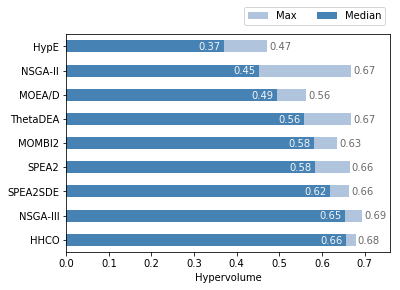

In [5]:
# Hypervolume
ax = dfoverall.plot.barh(y='max', color='lightsteelblue', label="Max")

for i in ax.patches:
    ax.text(i.get_width()+0.005, i.get_y()+.1, \
            round(i.get_width(), 2), color='dimgray')

ax = dfoverall.plot.barh(y='median', color='steelblue', ax=ax, label="Median")

for i in ax.patches[len(ax.patches)//2:]:
    ax.text(i.get_width()-0.06, i.get_y()+.1, \
            round(i.get_width(), 2), color='whitesmoke')

ax.set_xlabel("Hypervolume")
ax.set_ylabel("")
ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right', ncol=2)

yticklabels=[]
for name in dfoverall.index:
    yticklabels.append(labels[name])
ax.set_yticklabels(yticklabels)
ax.set_xlim(0,0.76)
fig = ax.get_figure()
plt.subplots_adjust(left=0.15)
fig.savefig("hvanalysis.pdf")


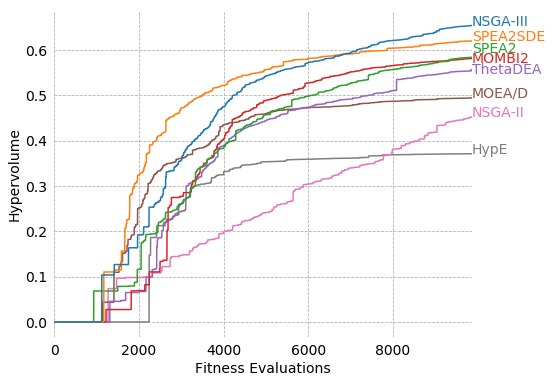

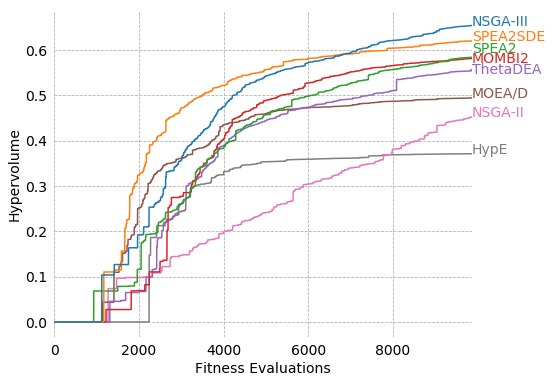

In [6]:
# MOEAs

offset={
    "NSGAIII": 0.0,
    "SPEA2SDE": 0.0,
    "SPEA2": 0.01,
    "CMOMBI2": -0.01,
    "ThetaDEA": -0.01,
    "CMOEAD": 0.00,
    "NSGAII": 0.00,
    "HypE": 0.00,
}


plot_hypervolume(["HypE","NSGAII","CMOEAD","ThetaDEA","CMOMBI2","SPEA2","SPEA2SDE","NSGAIII"], offset)

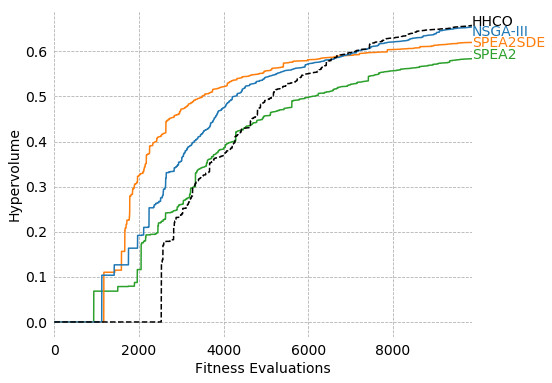

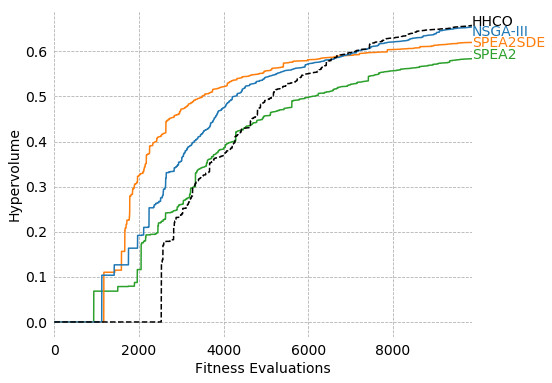

In [7]:
# best MOEAs and HHs

offset={
    "NSGAIII": -0.02,
    "SPEA2SDE": -0.01,
    "SPEA2": 0.00,
    "CMOMBI2": 0.0,
    "ThetaDEA": 0.0,
    "CMOEAD": 0.00,
    "NSGAII": 0.00,
    "HypE": 0.00,
    "CMOEADD": 0.00,
    "CHHCO": 0.00,
}


plot_hypervolume(["SPEA2", "SPEA2SDE", "NSGAIII", "CHHCO"], offset)